In [27]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
plt.rcParams['font.size'] = 13

In [75]:
raw=pd.read_csv('sparks001.csv')


In [76]:
raw

,Ship_Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
raw.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


now, I will check that , Is there any null values in our Raw Datasets ?

In [5]:
raw.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

i dont need postal code in my data , i will remove it.

In [77]:
raw.drop(['Postal Code'],axis=1,inplace=True)

In [78]:
raw

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Most Preferable Shipping Mode

In [80]:
pre_ship=raw.Ship_Mode.value_counts()
pre_ship

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64

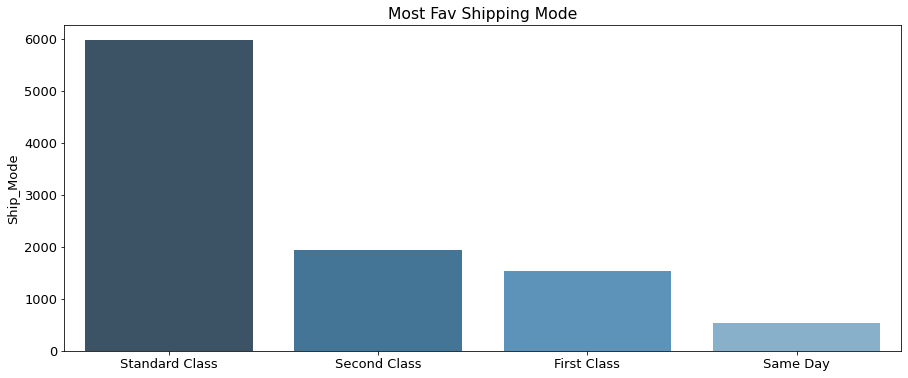

In [84]:
plt.figure(figsize=(15,6))
plt.title("Most Fav Shipping Mode")
sns.barplot(x=pre_ship.index,y=pre_ship,palette='Blues_d')

In [8]:
new_var=['City','Sales']
var_df=raw[new_var]


In [9]:
var_df

,City,Sales
0,Henderson,261.9600
1,Henderson,731.9400
2,Los Angeles,14.6200
3,Fort Lauderdale,957.5775
4,Fort Lauderdale,22.3680
...,...,...
9989,Miami,25.2480
9990,Costa Mesa,91.9600
9991,Costa Mesa,258.5760
9992,Costa Mesa,29.6000


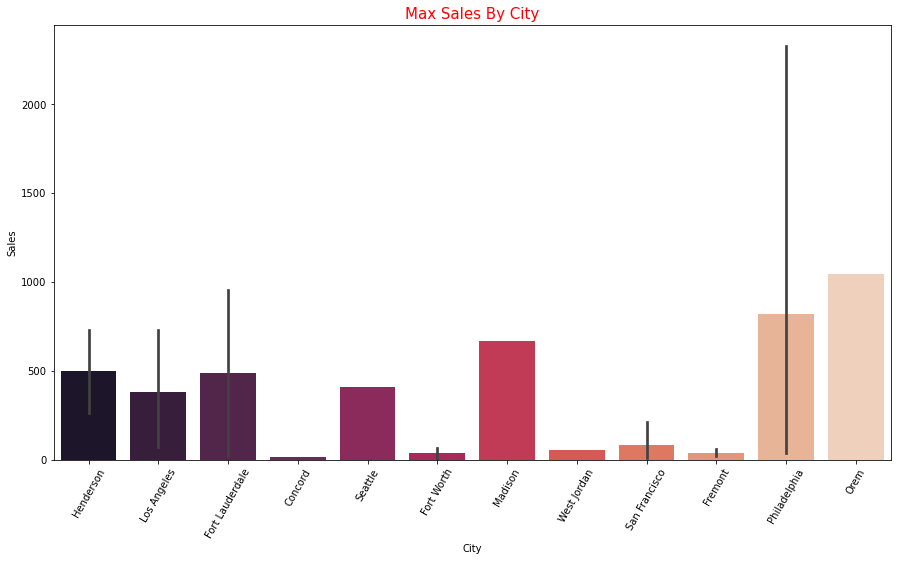

In [10]:
plt.figure(figsize=(15,8))
plt.title("Max Sales By City",color='r',size=15)
plt.xticks(rotation=60)
sns.barplot(x='City',y='Sales',data=var_df.head(30),palette='rocket')

# Profit By Categories

In [11]:
raw.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

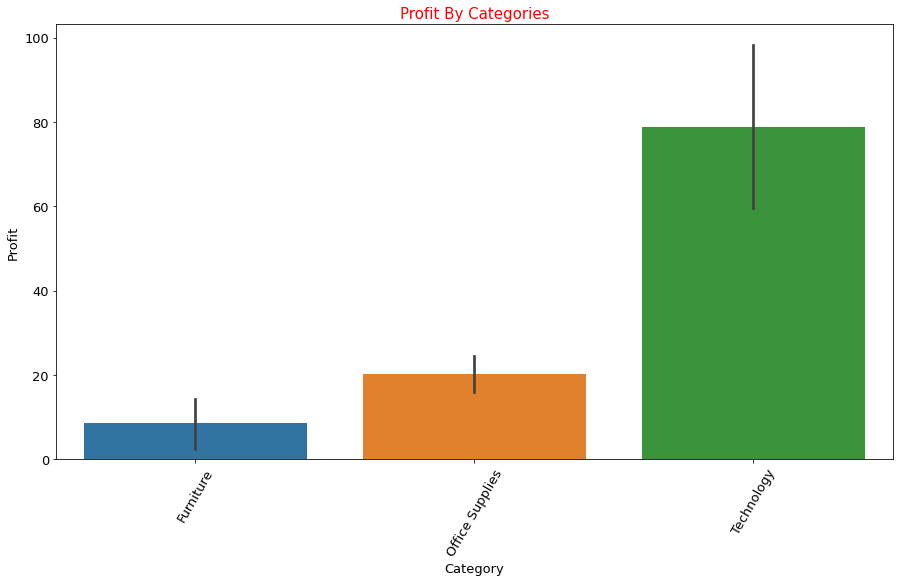

In [32]:
plt.figure(figsize=(15,8))
plt.title("Profit By Categories",color='r',size=15)
plt.xticks(rotation=60)
sns.barplot(x='Category',y='Profit',data=raw)

In [13]:
raw.Sub_Category.value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub_Category, dtype: int64

# Sub-Category(Phones)'s Profit In Different Cities

In [14]:
new=raw[['Sub_Category','City','Profit']]
phn=raw.Sub_Category=="Phones"

In [15]:
phn_df=new[phn]
top_profit=phn_df.sort_values(by=['Profit'],ascending=False)
top_profit

,Sub_Category,City,Profit
2492,Phones,Jamestown,1228.1787
7583,Phones,Springfield,909.9818
8312,Phones,Columbus,764.3818
5530,Phones,Omaha,743.9880
9398,Phones,New York City,661.4559
...,...,...,...
3587,Phones,Lancaster,-253.4337
3044,Phones,Troy,-255.7425
9673,Phones,Philadelphia,-374.9925
7509,Phones,Columbus,-377.9892


# Which Sub_Category Has Earned Max Profit in California ?

In [18]:
sta=raw[['State','Sub_Category','Profit']]
val=raw.State=="California"

In [23]:
val_df=sta[val]
state1_profit=val_df.sort_values(by=['Profit','Sub_Category'],ascending=[False,True])
state1_profit

,State,Sub_Category,Profit
8858,California,Binders,1906.4850
3273,California,Copiers,1049.9850
4619,California,Copiers,1007.9832
3983,California,Copiers,944.9865
9929,California,Copiers,944.9865
...,...,...,...
1505,California,Tables,-175.8708
3480,California,Tables,-195.4788
557,California,Tables,-217.0480
2539,California,Chairs,-219.1644


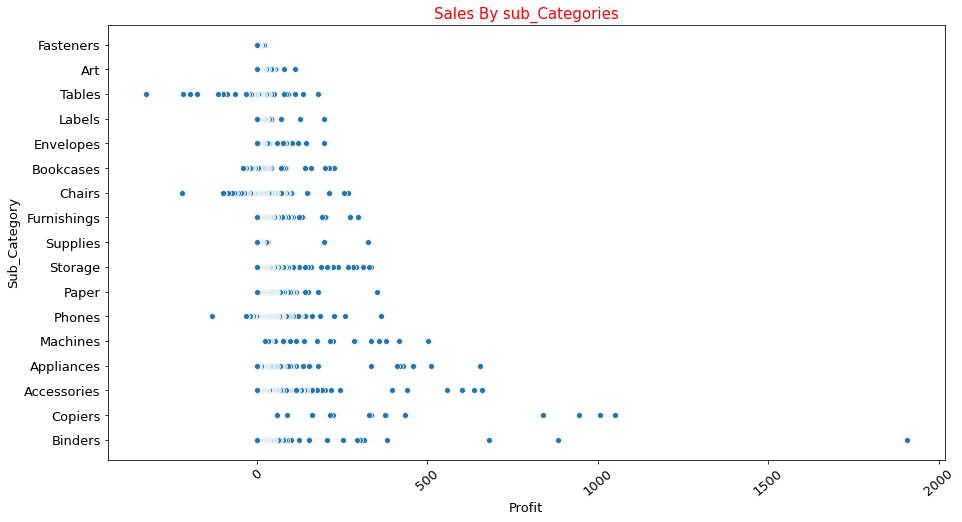

In [94]:
plt.figure(figsize=(15,8))
plt.title("Sales By sub_Categories",color='r',size=15)
plt.xticks(rotation=40)
sns.scatterplot(y='Sub_Category',x='Profit',data=state1_profit)

# Sales By Bookcases(sub_category) in Different Regions

In [40]:
new_var=raw[['Sub_Category','State','Region','Sales']]
basic1=raw.Sub_Category=='Bookcases'

In [41]:
basic=new_var[basic1]
basic_df=basic.sort_values(by=['Sales','Region'],ascending=[False,True])
basic_df


,Sub_Category,State,Region,Sales
9741,Bookcases,Vermont,East,4404.900
5917,Bookcases,New York,East,4228.704
6535,Bookcases,New York,East,4007.840
9649,Bookcases,California,West,3406.664
27,Bookcases,Pennsylvania,East,3083.430
...,...,...,...,...
6474,Bookcases,Pennsylvania,East,61.960
1302,Bookcases,Virginia,South,61.960
7565,Bookcases,Washington,West,48.580
2326,Bookcases,New York,East,46.384


<Figure size 1080x576 with 0 Axes>

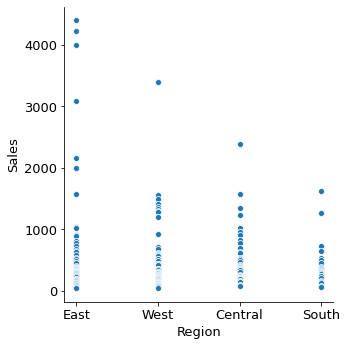

In [98]:
plt.figure(figsize=(15,8))
sns.relplot(x='Region',y='Sales',data=basic_df)


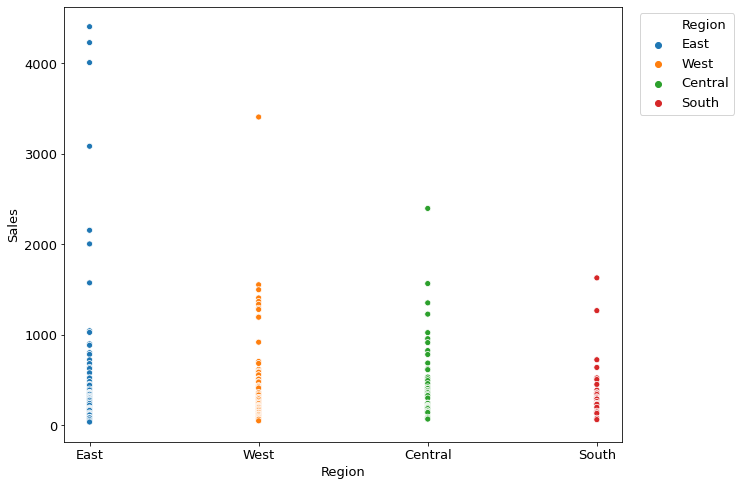

In [96]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Region',y='Sales',hue='Region',data=basic_df)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left')
